# Trabajando con datos en pandas

Ya habiendo importado nuestros datos a pandas, nuestras siguientes tareas serán: limpieza de la base de datos, transformación de variables y cálculo de nuevos indicadores, consultas específicas (por agrupación, selección, filtrado, y reordenamiento), generación de reportes (en la forma de tablas o gráficos).  Antes que todo, podemos obtener un resumen de nuestra información con los métodos `.describe()` y `.info()`.

```python
import pandas as pd
sueño = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/msleep.csv',
                      index_col = 0)
sueño.describe()
```


## 1. Fundamentos de limpieza de datos en pandas

### Datos faltantes (NA)

Lo primero que necesitamos en este rubro es reconocer los datos faltantes.  Pandas reconoce como faltantes los objetos de tipo `np.nan`(usado para variables numéricas) y el tipo nativo de Python `None`.  Usemos, como ejemplo, la serie

```python 
import pandas as pd
import numpy as np
ingredientes = pd.Series(['ajo', 'cebolla', 'pimiento', np.nan, 'sal', 'pimienta', None])
```

En pandas contamos con cuatro métodos básicos para lidiar con los datos ausentes

Método|Desripción
---|---
isna(a.k.a isnull)|Vector lógico indicando los elementos ausentes como `True`
notna (a.k.a notnull)| Negación lógica de `isnull`
dropna| Filtra la base por la presencia de valores ausentes. Se puede modular el umbral de tolerancia.
fillna| Imputación de valores en las observaciones ausentes. Puede ser un valor específico o un método de interpolación

```python
print(ingredientes.isna())
print(ingredientes.notna())
print(ingredientes.dropna())
print(ingredientes.fillna('Sabe qué cosa'))
```

En una base, es decir, cuando tenemos más de una columna, hay más posibilidades:

```python
from numpy import nan as NA
datos = pd.DataFrame([[1, 2, 3], [4, NA, NA], [NA, 5, 6], [NA, NA, NA]])
print(datos, '\n\n')
print(datos.dropna(), '\n\n') # elimina todos los renglones que contienen al menos un NaN
print(datos.dropna(axis = 1),'\n\n') # elimina todas las columnas que contienen al menos un NaN
print(datos.dropna(how = 'all'), '\n\n') # elimina un renglón si todas sus entradas son NaN
print(datos.dropna(thresh = 2), '\n\n') # conserva los renglones con al menos 2 valores observado
print(datos.dropna(subset = [0, 1]))
```

### Tu turno

Usa los datos de `sueño` para responder estas preguntas:
1. Cuántas horas sueña (`sleep_rem`) un mamífero en promedio? Cuál es la mediana? Cuál es el máximo?
2. Cuántos datos faltantes hay en la variable `sleep_rem`? Qué porcentaje de las entradas de sueño total (`sleep_total`) son datos faltantes? Qué porcentaje de las observaciones sobre la forma de alimentación (`vore`) son genuinas?
3. Cuál es el total de observaciones faltantes en el juego de datos?

In [30]:
print(datos, '\n\n')
print(datos.dropna(), '\n\n') # elimina todos los renglones que contienen al menos un NaN
print(datos.dropna(axis = 1),'\n\n') # elimina todas las columnas que contienen al menos un NaN
print(datos.dropna(how = 'all'), '\n\n') # elimina un renglón si todas sus entradas son NaN
print(datos.dropna(thresh = 2), '\n\n') # conserva los renglones con al menos 2 valores observado
print(datos.dropna(subset = [0, 1]))


     0    1    2
0  1.0  2.0  3.0
1  4.0  NaN  NaN
2  NaN  5.0  6.0
3  NaN  NaN  NaN 


     0    1    2
0  1.0  2.0  3.0 


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3] 


     0    1    2
0  1.0  2.0  3.0
1  4.0  NaN  NaN
2  NaN  5.0  6.0 


     0    1    2
0  1.0  2.0  3.0
2  NaN  5.0  6.0 


     0    1    2
0  1.0  2.0  3.0


Otra opción (no necesariamente muy recomendable) es imputar los valores ausentes con el método `.fillna()` que aceepta

Argumento | Acción
---|---
valor | Imputar ese valor
dict / Series / DataFrame | Indicando el valor de reemplazo para cada índice (al aplicarse sobre Series) o columna (al aplicarse sobre DataFrame)
method | Puede ser `backfill` alias `bfill` o `pad` alias `ffill`.  Utilizan las observaciones pasadas o futuras para propagarlas en los valores ausentes
axis | Determina sobre qué eje propagar o reemplazar
limit| Limita la propagación de `bfill` o `ffill` a `limit` observaciones (de tipo `int`)

```python
print(datos, '\n\n')
print(datos.fillna('Reemplazo'), '\n\n')
print(datos.fillna({0:'Cero', 1:'Uno', 2:'Dos'}),'\n\n')
print(datos.fillna(method = 'ffill'), '\n\n')
print(datos.fillna(method = 'ffill', axis = 1), '\n\n')
```



### Tipos de variable

Los tipos de variable que usaremos en nuestros análisis de datos y la información que representan puede leers en la siguiente tabla:

Contenido | Tipo de variable
--- | ---
Conteos, número de unidades, etc. | `int`
Mediciones continuas (salario, temperatura, etc.) | `float`
Clasificación binaria (sexo, afiliación partidaria, etc.) | `bool`
Fechas | `datetime`
Texto | `str`
Categorías (clasificación) | `category`

Una práctica usual es codificar factores como números enteros y dar un diccionario.  En estos casos merece la pena cambiar el tipo de registro de `int` a `category` para obtener información más relevante.  Por ejemplo, miremos la columna `color` de esta base de datos

```python
diamantes = pd.read_csv('../Datos/diamonds_factors.csv', parse_dates = [10])
diamantes
```
El color está codificado con los números 1, 2, 3, ..., 7 y debería ser una variable categórica; pero en nuestra importación es una variable entera.  El resumen `diamantes['color'].describe()` es inútil.  Para arreglarlo simplemente cambiaremos el tipo como sigue:

```python
diamantes['color'] = diamantes['color'].astype('category')
assert diamantes['color'].dtype == 'category'
```
Otro error común de clasificación de tipo ocurre cuando una columna numérica es registrada con sus unidades como en tiempo = _12 minutos_ o precio = $ 450.31.

En estos casos el método `.str.strip('qué_quitar')` puede ser de utilidad.  

### Tu turno
Intenta corregir la columna `precio` de la base de datos de diamantes.  Para ello:
0. Intenta una descripción de la columna de precios. Es la información relevante?
1. Elimina el signo '$' usando el método `str.split('$')`
2. Convierte la columna así obtenida en tipo `float`
3. Escribe un assert statement para verificar este cambio de tipo
4. Vuelve a hacer la descripción.  Los cambios merecen la pena?


## Revisión de límites 

Cierto tipo de datos puede tener límites naturales; por ejemplo, una clasificación podría referir a cinco tipos distintos y con ello su rango estaría limitado a cinco valores.  No obstante, por múltiples razones podría haber registros que no cumplen con estos requisitos. 

En nuestro ejemplo, el campo de fecha de venta tiene un límite natural: la fecha actual.  Para corroborar que todas las fechas de venta han sido correctamente registradas, podemos ejecutar:

```python
import datetime as dt
any(diamantes['date_sold'] > dt.datetime.today())
```
La respuesta `True` nos indica que existen registros fuera de fecha...

### Tu turno
1. Modificando el código anterior, determina cuántos registros están fuera de fecha
2. Imprime solo esos renglones de la base de datos
3. Opciones:

    3.1 Cambia la observación de la columna `date_sold` a NA (`np.nan`) para estas observaciones e imprime de nuevo estos registros
    3.2 En vez de cambiar los registros por NA, redefine la base de forma que incluya solo las observaciones correctamente registradas (Usa el método de selección `diamantes[...]`.
    3.3 Repite el inciso anterior; pero ahora usando el método `.drop()


## Registros duplicados 

Otro problema común en una base de datos es la de registros duplicados.  Para revisar si nuestra base de datos tiene registros duplicados podemos ejecutar.

```python
any(diamantes.duplicated())
```

El vector `diamantes.duplicated()` marca, por defecto, todas menos la primera ocurrencia de la repetición.  En nuestro caso las observaciones 15345, 39878, 41398, 50808, marcadas por el método, corresponden a ocurrencias de registros repetido.  Para ver todas las repeticiones, podemos usar el parámetro `keep = False`.  La otra opción posible es `subset` para elegir las columnas en las que se buscarán los repetidos (id, combinaciones únicas, etc.).

### Tu turno

1. Imprime todas los valores repetidos de la tabla con el método `.duplicated()`.  Asegúrate de ver todas las ocurrencias de cada caso (debe haber dos de cada registro).

2. Ahora ordena tus resultados para mejor visualización con el método `sort_values(by = 'date_sold')

3. Finalmente, utiliza el método `drop_duplicates()` de forma que la base creada conserve únicamente la **última** ocurrencia de cada registro.

Más adelante, conforme desarrollemos más técnicas en Pandas, podremos abordar la solución de problemas más complejos con los datos como inconsistencias en las categorías de registro (tipo de sangre C+), registros múltiples para una misma categoría (como 'Mx', 'mx', 'MX', ' Mx', '      MX   '), exceso de categorías en una clasificación y la necesidad de reasignar grupos, formatos inapropiados en un campo de texto (email: nelson?muriel@gmailcom; teléfono: 4321) y más.

### Preparación: diamantes_clean

Utiliza la siguiente celda para recopilar todos los cambios que hicimos a la base `diamantes` y guarda el resultado final en el objeto `diamantes_clean`.   Tu base final debe tener dimensiones `53940 rows x 11 columns`

In [210]:
diamantes = pd.read_csv('../Datos/diamonds_factors.csv', parse_dates = [10])
diamantes['color'] = diamantes['color'].astype('category')
diamantes['price'] = diamantes['price'].str.strip('$').astype('float')
bad_records = diamantes['date_sold'] > dt.datetime.today()
index = diamantes[bad_records].index
diamantes.drop(index = index)
diamantes_clean = diamantes.drop_duplicates(keep = 'last')
diamantes_clean

,carat,cut,color,clarity,depth,table,price,x,y,z,date_sold
0,1.68,Very Good,3,VS2,61.1,60.0,15309.0,7.63,7.70,4.68,2009-03-30
1,0.38,Ideal,6,SI1,61.8,54.0,593.0,4.66,4.70,2.89,2007-05-10
2,1.20,Fair,4,I1,64.4,55.0,2655.0,6.77,6.61,4.31,2003-01-12
3,0.32,Premium,2,SI1,62.3,58.0,720.0,4.40,4.37,2.73,2007-05-31
4,0.50,Very Good,1,VS2,61.1,58.0,1646.0,5.07,5.11,3.11,2003-08-18
...,...,...,...,...,...,...,...,...,...,...,...
53939,0.54,Ideal,6,SI1,61.4,56.0,1114.0,5.25,5.27,3.23,2011-07-10
53940,0.38,Premium,3,VS2,60.9,56.0,1026.0,4.72,4.67,2.86,2016-05-23
53941,1.07,Ideal,6,VS1,62.0,53.0,5373.0,6.61,6.62,4.10,2011-12-04
53942,1.21,Good,4,SI1,63.8,58.0,5597.0,6.75,6.64,4.27,2006-10-03


## 2. Los métodos de interacción con una tabla.

Hay seis acciones básicas que nos serán de utilidad en el análisis de una tabla:
1. Hacer consultas (`.query()`) sobre las columnas de una base de datos, p.ej. "Restrignirse a los diamantes con una claridad "VS2" y color 3)"
2. Hacer un filtrado de columnas (`.filter()`) para utilizar únicamente las columnas que sean de nuestro interés, p. ej. mirar únicamente el quilataje, color, claridad, y precio de los diamantes.
3. Generar nuevas columnas (`.assign()`) usando la información presente en la base de datos, p.ej. calcular el precio por quilate dividiendo `price` entre `carat`.
4. Agrupar nuestra información en grupos para el análisis (`.groupby()`), p.ej. agrupar por `cut` para examinar el valor en cada categoría.
5. Realizar cálculos agregados (`.agg()`) como medias, desviaciones estándar, etc., p.ej. calcular el precio medio de los diamantes de cada tipo de corte.
6. Ordenar los resultados según una columna (`.sort_values()`).

El código para las consultas especificadas en los ejemplos es el siguiente:

```python
diamantes_clean.query('clarity == "VS2" and color == 3')
diamantes_clean.filter(['carat', 'color', 'clarity', 'price'])
diamantes_clean.assign(ppcarat = lambda x: x.price/x.carat)
diamantes_clean.groupby('cut') #en realidad no cambia nada, solo agrupa
diamantes_clean.groupby('cut').agg(mean)
```
Obsérvese que en las últimas línea se concatenaron dos métodos. Como consejo de estilo, puede ser más legible el escribir esta consulta en la forma: 

```python
(diamantes_clean
  .groupby('cut')
  .agg('mean'))
```

Ahora bien, podríamos concatenar un tercero si quisieramos exacta y únicamente los precios medios...

Algunas funciones que podemos usar dentro de `.agg()` son:

Función | Descripción
---|---
mean | Calcula la media (promedio aritmético)
median | Calcula la mediana (percentil 50%)
var | Calcula la varianza muestral
std | Calcula la desviación estándar
sum | Suma los elementos
quantile | Calcula los cuantiles (percentiles) de la variable
min | Calcula el valor mínimo
max | Calcula el valor máximo
count | Cuenta (generalmente usado sobre grupos o categorías)
describe | Funciona también concatenado a `groupby`

### Tu Turno
1. Para ver más de una agregación, podemos usar una lista como argumento para `.agg()`.  Completa la última consulta añadiendo `median` y `std` a las funciones de agregación y el método `.filter()` a la consulta de modo que sólo se reporte el precio.  Recuerda que se filtra con una **lista**.  

2. Otra opción en `.agg()` es definir tu propia función de agregación.  En este caso debemos pasar **el nombre de la función** directamente, **no en tipo** `str`.  Define tu propia función `iqr()` basada en `np.quantile` y añade esta función al resumen.  Asigna esta base al objeto `price_summary`.

#### Nota

Esta base de datos tiene un índice jerárquico para las columnas.  Las columnas ya no son `price_summary['mean']` ni `price_summary.loc[:, 'mean']`.  Ahora deberemos acceder a ellas con una `tuple` para el nombre de columna.  La primera entrada es el identificador exterior (`price`) y la segunda entrada es el identificador interior (`mean`, `median`, `std`, `iqr`).  Por ejemplo, podemos seleccionar
```python
price_summary.loc[: , ('price', ['mean'])]
```
Observe que `'mean'` aparece dentro de corchetes.  El seleccionar con una lista provoca que la respuesta sea del tipo `pandas.core.frame.DataFrame` y no del tipo `pandas.core.series.Series`.  En caso de brindar una lista más larga, la selección será de esas columnas.

##### **Práctica**

A modo de práctica:
1. Genera una base de datos en la que se lea la media, desviación estándar y mediana para las variables `price` y `carat` (en ese orden) agrupados por la variable `cut`.
2. Selecciona, de la base anterior, las columnas media y mediana para `price`.

## 2.1 Usando los métodos de interacción de una tabla 

Estos cinco métodos son la base para responder preguntas concretas sobre la información presente en la base de datos. Para ejemplificar esto, usaremos la base de datos `msleep`, proveniende del paquete `ggplot2` de R y disponible en `https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/msleep.csv`.   Consulte la [descripción de esta base](https://ggplot2.tidyverse.org/reference/msleep.html).  

Preguntas: 
1. Hay alguna diferencia en el tiempo total del sueño según el tipo de alimentación?
2. Algún régimen alimenticio está asociado, en esta base, con cerebros más grandes (relativos al cuerpo)?
3. Cuáles son los cinco animales que más tiempo duermen, qué porcentaje del día duermen, y qué dieta siguen?

Respuestas posibles:
```python
# 1. -------
(
 msleep
    .filter(['sleep_total'])
    .groupby('vore')
    .agg(['mean', 'median', 'std', iqr])
)


# 1 extendida. -------

def perc_over_10(x):
    return np.mean(x >= 10)

def perc_over_15(x):
    return np.mean(x >= 15)

(
msleep
    .filter(['vore', 'sleep_total'])
    .groupby('vore')
    .agg(['mean', 'median', iqr, perc_over_10, perc_over_15])
)


# 2. -------
brainwt_data = (msleep
    .filter(['vore', 'brainwt', 'bodywt'])
    .assign(percentage_brainwt = lambda x: 100 * x.brainwt / x.bodywt)
    .groupby('vore')
    .agg(['mean', 'median', 'std', iqr, 'count']))

brainwt_data.loc[:, ['percentage_brainwt']]


# 3. ------

(msleep
 .filter(['name', 'sleep_total','vore'])
 .assign(sleep_relative_day = lambda x: 100 * x.sleep_total / 24)
 .sort_values(by = 'sleep_total', ascending = False)
 .iloc[0:5, ]
)

```
En la siguiente celda tienes el código para cargar la base de datos.  Utiliza las siguientes celdas para probar estas consultas. 

### Tu turno
Trabajemos en grupo... Cada grupo deberá plantear 5 preguntas a su base de datos y responderlas con las 6 operaciones básicas.




In [431]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/msleep.csv'
msleep = pd.read_csv(url, index_col = 0)

In [440]:
# Pega aquí las consultas que quieras ejeutar

## Reshaping your data...otras formas de visualización y comunicación

### 1. Pivotar
Pandas ofrece distintos métodos para cambiar la forma de nuestros datos.  Exploremos primero con _pivotar_ tablas **sin agregar valores** sino únicamente cambiando de forma.
```python
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

df
df.pivot(index = 'foo', columns = 'bar', values = 'baz')
df.pivot(index = 'foo', columns = 'bar', values = ['baz', 'zoo'])
df.pivot(index = 'foo', columns = 'bar')
```
El método no permite repeticiones y devolverá un `ValueError` si los encuentra como en

```python
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
                        "B": ["one", "one", "one", "two", "two", "one", "one", "two", "two"],
                        "C": ["small", "large", "large", "small", "small", "large", "small", "small","large"],
                        "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                        "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df.pivot(index = 'A', columns = 'B', values = 'C')
```

Para casos como este, tenemos el método `.pivot_table()` que además de los argumentos `index`, `columns`, y `values`, utiliza el argumento `aggfunc`, la función para agregar los casos repetidos. Su valor por defecto es `numpy.mean`. Puede utilizarse una lista de funciones y el resultado será una tabla indexada jerarquicamente. 

```python
df.pivot_table(index = 'A', columns = 'B', values = 'C', aggfunc = 'count')
df.pivot_table(index = 'A', columns = 'B', values = 'D', aggfunc = 'sum')
df.pivot_table(index = 'A', columns = 'B', values = 'D', aggfunc = ['mean', 'std'])
df.pivot_table(index = 'A', columns = 'B', values = ['D', 'E'], aggfunc = ['mean', 'std'])
df.pivot_table(index = 'A', columns = 'B', values = ['D', 'E'], aggfunc = ['mean', 'std'], margins = True)
df.pivot_table(index = 'A', columns = 'B', aggfunc = ['mean', 'std'])  # Falta algo?
df.pivot_table(index = 'A', columns = 'B', values = 'C', aggfunc = ['mean', 'std'])  # DataError

df.pivot_table(index = ['A', 'B'], columns = 'C', values = 'D')
```

In [4]:
import pandas as pd
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df.pivot(index = 'foo', columns = 'bar', values = 'baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


### 2. Lo contrario...expandiendo nuestra base

Pivotar la tabla produce una compresión de los datos. La operación contraria, expandir la base para ver todos sus registros, se puede llevar a cabo con el método `.melt()`.  Es un método útil cuando los nombres de columna son valores de una variable; esto es, cuando la tabla está pivotada.  Por ejemplo, el Secretariado Ejecutivo del Sistema Nacional de Seguridad publica los datos de la incidencia delictiva del fuero común por estado. Al leerlos, obtenemos:


In [1]:
import pandas as pd
incidencia_fc = pd.read_csv('../Datos/IDEFC_NM_may2020.csv', encoding = 'iso-8859-1', thousands = ',')
#incidencia_fc.head()

La tabla está, clarmente, pivotada por la variable `mes`.  Para expandirla haremos 

```python
vars_id = incidencia_fc.columns.values[range(0, 7)]
incidencia_fc.melt(id_vars = vars_id, 
                   var_name = 'Mes', 
                   value_name= 'Total')
```

In [2]:
vars_id = incidencia_fc.columns.values[range(0, 7)]
incidencia_tidy = incidencia_fc.melt(id_vars = vars_id, 
                   var_name = 'Mes', 
                   value_name= 'Total')

In [3]:
import locale
locale.setlocale(locale.LC_TIME, 'es_ES')

incidencia_tidy = incidencia_tidy.assign(Periodo = lambda x: x.Año.astype('str') + '-' + x.Mes)
incidencia_tidy['Tiempo'] = pd.to_datetime(incidencia_tidy['Periodo'], format = "%Y-%B")
incidencia_tidy.set_index('Tiempo')

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Total,Periodo
Tiempo,,,,,,,,,,
2015-01-01,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,3.0,2015-Enero
2015-01-01,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1.0,2015-Enero
2015-01-01,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0.0,2015-Enero
2015-01-01,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,2.0,2015-Enero
2015-01-01,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0.0,2015-Enero
...,...,...,...,...,...,...,...,...,...,...
2020-12-01,2020,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,Diciembre,NaN,2020-Diciembre
2020-12-01,2020,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,Diciembre,NaN,2020-Diciembre
2020-12-01,2020,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Diciembre,NaN,2020-Diciembre


# Visualización de datos


Puede consultar todos los marcadores [aquí](https://matplotlib.org/api/markers_api.html?highlight=markers#module-matplotlib.markers)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def q25(series): 
    return np.quantile(series, 0.25)

def q75(series):
    return np.quantile(series, 0.75)

def make_estado(Estado):
    data_estado = (incidencia_tidy
                    .query('Entidad == @Estado')
                    .groupby(['Tiempo'])
                    .agg({'Total':sum})
                    )
    return(data_estado)

def robo_anual_entidad(Entidad):
    data_anual = (incidencia_tidy.query('Entidad == @Entidad and `Subtipo de delito`== "Robo a transeúnte en vía pública"')
                  .groupby(['Tiempo'])
                  .agg({'Total':sum}))
    data_anual = (data_anual.groupby(data_anual.index.strftime('%Y'))
                  .agg([sum, 'mean', 'std', 'min', 'max', q25, q75]))
    return data_anual                

In [10]:
aguas = make_estado('Aguascalientes')
yuca = make_estado('Yucatán')
robo_aguas = robo_anual_entidad('Aguascalientes')
robo_yuca = robo_anual_entidad('Yucatán')

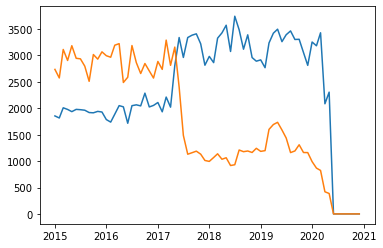

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(aguas['Total'])
ax.plot(yuca['Total'])

plt.show()

In [105]:

fig, ax = plt.subplots()
ax.plot(aguas['Total'], 
        marker = 'o', linestyle = '--')

ax.plot(yuca['Total'],
       marker = 'v', linestyle = '-.')

plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:

fig, ax = plt.subplots()
ax.plot(aguas['Total'], 
        marker = 'o', linestyle = '--', color = 'red')
ax.plot(yuca['Total'],
       marker = 'v', linestyle = '-.', color = 'green')

ax.set_xlabel('Tiempo (en meses)')  #Métodos "set_"
ax.set_ylabel('Crímenes (total)')
ax.set_title('Incidencia criminal en Aguascalientes y Yucatán')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [135]:
%matplotlib widget
fig, ax = plt.subplots()

# La parte de aguascalientes
ax.plot(robo_aguas[('Total','mean')], marker = 'o', color = 'darkslategrey')
ax.plot(robo_aguas[('Total', 'q25')], marker = '^', color = 'firebrick', linestyle = ':')
ax.plot(robo_aguas[('Total', 'q75')], marker = 'v', color = 'firebrick', linestyle = ':')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
%matplotlib widget
fig, ax = plt.subplots()

# La parte de aguascalientes
ax.plot(robo_aguas[('Total','mean')], marker = 'o', color = 'darkslategrey')
ax.plot(robo_aguas[('Total', 'q25')], marker = '^', color = 'firebrick', linestyle = ':')
ax.plot(robo_aguas[('Total', 'q75')], marker = 'v', color = 'firebrick', linestyle = ':')
# Añadimos yucatán
ax.plot(robo_yuca[('Total','mean')], marker = 'o')
ax.plot(robo_yuca[('Total', 'q25')], marker = '^', linestyle = ':', color = 'orange')
ax.plot(robo_yuca[('Total', 'q75')], marker = 'v', linestyle = ':', color = 'orange')
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [1]:
%matplotlib widget
fig, ax = plt.subplots(1, 2)
ax[0].plot(robo_aguas[('Total','mean')], marker = 'o', color = 'darkslategrey')
ax[0].plot(robo_aguas[('Total', 'q25')], marker = '^', color = 'firebrick', linestyle = ':')
ax[0].plot(robo_aguas[('Total', 'q75')], marker = 'v', color = 'firebrick', linestyle = ':')

ax[1].plot(robo_yuca[('Total','mean')], marker = 'o')
ax[1].plot(robo_yuca[('Total', 'q25')], marker = '^', linestyle = ':', color = 'orange')
ax[1].plot(robo_yuca[('Total', 'q75')], marker = 'v', linestyle = ':', color = 'orange')

ax[0].set_title('Aguascalientes')
ax[1].set_title('Yucatán')

ax[0].set_ylabel('Robos totales')

fig.suptitle('Robos totales y percentiles del 25 y 75')

plt.show()

NameError: name 'plt' is not defined

#### Tu turno

Otra forma de arreglar el problema del gráfico anterior es dar a cada curva su propio eje y.  En este ejercicio lo harás siguiendo los siguientes pasos:

1. Define `fig` y `ax` con `plt.subplots()`
2. Añade el gráfico de los robos totales de Aguascalientes
3. Nomina el eje x como `'Tiempo'` y el eje y como `'Aguascalientes (total)'`
4. Define `ax2` con el método `ax.twinx()` para generar un nuevo sistema coordenado.  Este sistema coordenado comparte la coordenada x con ax; pero tiene la coordenada y libre.  
5. En el eje ax2 añade el gráfico de los robos totales en Yucatán
6. Nomina el eje y de ax2 como `'Yucatán (total)'`
7. Agrega un título a tu gráfico

Si lo consideras necesario o útil, da un color distinto a cada línea y usa marcadores.  Si usas colores, añade el argumento `color = ...` al método `.set_ylabel()`


In [36]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(robo_aguas[('Total','mean')], marker = 'o', color = 'blue')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Aguascalientes (total)', color = 'blue')
ax.tick_params('y', colors = 'blue')
ax2 = ax.twinx()
ax2.plot(robo_yuca[('Total', 'mean')], color = 'orange', marker = 'o')
ax2.set_ylabel('Yucatán (total)', color = 'orange')
ax2.tick_params('y', colors = 'orange')
ax.set_title('Robos Totales')
plt.show

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [47]:
# Haciendo lo anterior una función (de una serie)
def add_ts_plot(axis, y, color, ylabel, *args):
    axis.plot(y, color = color, *args)
    axis.set_ylabel(ylabel, color = color)
    axis.tick_params('y', colors = color)

fig, ax = plt.subplots()
add_ts_plot(ax, robo_aguas[('Total', 'mean')], 'blue', 'Aguascalientes (medio)')

ax2 = ax.twinx()
add_ts_plot(ax2, robo_yuca[('Total', 'mean')], 'orange', 'Yucatán (medio)')
    
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
# OTRA COSA UTIL: EL ZOOM POR FECHAS
mis_años = aguas['2016-05-01':'2018-05-31']
fig, ax = plt.subplots()
ax.plot(mis_años['Total'], 
        marker = 'o', linestyle = '--', color = 'darkcyan')
ax.set_xlabel('Tiempo (en meses)')  #Métodos "set_"
ax.set_ylabel('Crímenes (total)')
plt.xticks(rotation=45)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(array([736055., 736146., 736238., 736330., 736420., 736511., 736603.,
        736695., 736785.]),
 <a list of 9 Text xticklabel objects>)

## Comparaciones y resúmenes...

In [55]:
def robos_nacional_año(año):
    robos_nacional = (incidencia_tidy
                 .query('Año == @año and `Subtipo de delito` == "Robo a transeúnte en vía pública"')
                 .groupby(['Entidad', 'Modalidad'])
                 .agg({'Total':sum})).unstack()  
    return robos_nacional

In [56]:
robos_2017 = robos_nacional_año(2017)
robos_2017.head()

Total              
Modalidad           Con violencia Sin violencia
Entidad                                        
Aguascalientes              659.0        1290.0
Baja California            3395.0        2287.0
Baja California Sur          54.0          20.0
Campeche                     42.0           0.0
Chiapas                     976.0         360.0

In [64]:
%matplotlib widget
fig, ax = plt.subplots()

ax.set_title('Robos en el año 2017')

ax.bar(robos_2017.index, robos_2017[('Total', 'Con violencia')])
ax.set_ylabel('Robos Totales en el año')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [65]:
%matplotlib widget
fig, ax = plt.subplots()

ax.set_title('Robos en el año 2017')

ax.bar(robos_2017.index, robos_2017[('Total', 'Con violencia')])
ax.set_ylabel('Robos Totales en el año')

ax.set_xticklabels(robos_2017.index, rotation = 90,
                  fontdict = {'fontsize': 5})

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [66]:
%matplotlib widget
fig, ax = plt.subplots()

ax.set_title('Robos en el año 2017')

ax.bar(robos_2017.index, robos_2017[('Total', 'Con violencia')])
ax.set_ylabel('Robos Totales en el año')

ax.bar(robos_2017.index, robos_2017[('Total', 'Sin violencia')], bottom = robos_2017[('Total', 'Con violencia')])

ax.set_xticklabels(robos_2017.index, rotation = 90,
                  fontdict = {'fontsize': 5})

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [69]:
%matplotlib widget
fig, ax = plt.subplots()

ax.set_title('Robos en el año 2017')

ax.bar(robos_2017.index, robos_2017[('Total', 'Con violencia')], label = 'Con violencia')
ax.set_ylabel('Robos Totales en el año')

ax.bar(robos_2017.index, robos_2017[('Total', 'Sin violencia')], bottom = robos_2017[('Total', 'Con violencia')], label = 'Sin violencia')

ax.set_xticklabels(robos_2017.index, rotation = 90,
                  fontdict = {'fontsize': 5})
ax.legend()

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Tu turno
Repite la idea del gráfico anterior; pero genera un gráfico porcentual (la altura de la barra azul deberá ser el porcentaje de robos con violencia en cada entidad federativa).  Para ello:

1. Genera una nueva base de datos que contenga las columnas porcentuales (tendrás que calcularlas)
2. Sigue el procedimiento del gráfico anterior con estas nuevas columnas

In [118]:
a = (incidencia_tidy
 .query('Año == 2017 and `Subtipo de delito`=="Robo a transeúnte en vía pública"')[['Entidad', 'Modalidad', 'Total']]
 .pivot_table(index = 'Entidad', columns = ['Modalidad'], aggfunc = sum, margins = True, margins_name = 'Total')
)

a.columns = a.columns.get_level_values(1)

a = a.assign(CV = lambda x:x['Con violencia'] / x['Total']).assign(SV = lambda x:x['Sin violencia'] / x['Total'])

%matplotlib widget
fig, ax = plt.subplots()

ax.set_title('Robos en el año 2017')

ax.bar(a.index, a['CV'], label = 'Con violencia')
ax.set_ylabel('Robos Totales en el año')

ax.bar(a.index, a['SV'], bottom = a['CV'], label = 'Sin violencia')

ax.set_xticklabels(a.index, rotation = 90,
                  fontdict = {'fontsize': 5})
ax.legend()

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [130]:
robos_2018 = incidencia_tidy.query('`Subtipo de delito`== "Robo a transeúnte en vía pública" and Año == 2018')
robos_2018_cdmx = robos_2018.query('Entidad == "Ciudad de México"')
robos_2018_edomx = robos_2018.query('Entidad == "México"')

In [173]:
%matplotlib widget
fig, ax = plt.subplots()
ax.hist(robos_2018_edomx['Total'], label = 'Estado de México', bins = 20) #key-word argument bins
ax.hist(robos_2018_cdmx['Total'], label = 'Ciudad de México', bins = 30)  #kew-word argument alpha
ax.set_xlabel('Número de robos')
ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### Tu turno
Utiliza un histograma con diferente número de `bins` para investigar el quilataje de los diamantes de la base `diamantes_clean`.

In [179]:
"""
diamantes = pd.read_csv('../Datos/diamonds_factors.csv', parse_dates = [10])
diamantes['color'] = diamantes['color'].astype('category')
diamantes['price'] = diamantes['price'].str.strip('$').astype('float')
bad_records = diamantes['date_sold'] > dt.datetime.today()
index = diamantes[bad_records].index
diamantes.drop(index = index)
diamantes_clean = diamantes.drop_duplicates(keep = 'last')
diamantes_clean
"""
fig, ax = plt.subplots(2, 2)
bins = np.array([30, 50, 100, 200]).reshape(2, 2)
for i in [0, 1]:
    for j in [0,1]:
        ax[i, j].hist(diamantes['carat'], bins = bins[i, j])
fig.suptitle('Dispersión de la variable `carat`')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0.98, 'Dispersión de la variable `carat`')

In [192]:
%matplotlib widget
fig, ax = plt.subplots()

ax.boxplot([robos_2018_edomx.query('Modalidad == "Con violencia"')['Total'],
            robos_2018_edomx.query('Modalidad == "Sin violencia"')['Total']],
           labels = ['Con Violencia', 'Sin Violencia'])  # kwd-arg vert
ax.set_ylabel('Robos totales')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Robos totales')